# The study of patterns that determine the success of a computer game

## Study content <a id='contents'> </a>

* [1. Research goal and work plan](#purpose)
* [2. Data overview](#data_overview)
    * [2.1. Conclusions](#data_overview_conclusion)
* [3. Data preprocessing](#data_preprocessing)
    * [3.1. Changing column names](#column_names)
    * [3.2. Changing data types](#types)
    * [3.3. Gap handling](#gaps)
    * [3.4. Handling duplicates](#duplicates)
    * [3.5. Handling anomalies](#anomalies)
    * [3.6. Adding new columns](#add_new_columns)
    * [3.7. Conclusions](#data_preprocessing_conclusions)
* [4. Exploratory data analysis](#research)
    * [4.1. Game release dynamics by years](#games_release_by_years)
    * [4.2. Sales statistics by platform](#games_sales_by_platf)
    * [4.3. 2017 Potentially Profitable Platform Selection](#profitable_platf)
    * [4.4. Scope charts of global game sales by platform](#global_sales_by_platf)
    * [4.5. Impact of user and critic scores on sales within the platform](#scores)
    * [4.6. General distribution of games by genre](#genres)
* [5. User portrait of each region](#portrait_of_user)
    * [5.1. Top 5 popular platforms in regions](#top_5_by_platf)
    * [5.2. Top 5 popular genres in regions](#top_5_by_genres)
    * [5.3. Impact of ESRB rating on sales in certain regions](#rating_influence)
    * [5.4. Conclusions](#portrait_conclusion)
* [6. Hypothesis checking](#hypothesis_checking)
    * [6.1. The average user ratings of the Xbox One and PC platforms are the same](#user_scores_avg)
    * [6.2. Average user ratings for Action and Sports are different](#user_scores_avg_2)
* [7. Research results](#research_results)

## 1. Research goal and work plan <a id='purpose'> </a>

We have historical data on sales, user and expert ratings, genres and platforms of computer games.

**Task**

To identify patterns that determine the success of the game and identify a potentially popular product for further planning of advertising campaigns.

**Data Description**

- `Name` — game name  
- `Platform` — platform  
- `Year_of_Release` — release year  
- `Genre` — game genre  
- `NA_sales` - sales in North America (millions of copies sold)  
- `EU_sales` - sales in Europe (millions of copies sold)  
- `JP_sales` - sales in Japan (millions of copies sold)  
- `Other_sales` - sales in other countries (millions of copies sold)  
- `Critic_Score` - score of critics (maximum 100)  
- `User_Score` - user score (maximum 10)  
- `Rating` — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

*Data for 2016 may not be complete.
**Work Plan**

This work consists of the following steps:
1) Description of the objectives of the study and work plan  

2) Data overview:  
- open the data file and study the general information.  

3) Data preprocessing:  
- replace the names of the columns (reduce to lower case);  
- convert the data to the required types and describe in which columns the data type was replaced and why;  
- We will process passes if necessary;  
 * explain why they filled in the gaps in a certain way or why they didn’t;  
 - describe the reasons that could lead to omissions;  
 * separately analyze the value of 'tbd' in the column with user ratings and describe how to process it;  
- calculate the total sales in all regions and write them in a separate column.  

4) Exploratory data analysis:  
- let's see how many games were released in different years and whether the data for all periods is important;  
- let's see how sales have changed by platform, select the platforms with the highest total sales and plot the distribution by year; find out for what characteristic period new platforms appear and old platforms disappear;  
- take data for the relevant current period, which will help build a forecast for 2017;  
- find out which platforms are leading in sales, growing or falling and select several potentially profitable platforms;  
- build a swing diagram of global game sales by platform and describe the result;  
- let's see how the reviews of users and critics affect sales within one popular platform; build a scatterplot and calculate the correlation between reviews and sales; formulate conclusions;  
- correlate the findings with sales of games on other platforms;  
- look at the overall distribution of games by genre and find out what can be said about the most profitable genres and whether genres with high and low sales stand out;  

5) Drawing up a portrait of the user of each region:  
- define for the user of each region (NA, EU, JP):  
 * the most popular platforms (top 5) (we will describe the differences in sales shares);  
 * the most popular genres (top 5) (explain the difference);  
 * Whether the ESRB rating affects sales in a particular region.  

6) Hypothesis testing:  
* the average user ratings of the Xbox One and PC platforms are the same;  
* the average user ratings of the Action and Sports genres are different;  

7) Results of the study and general conclusion.  

[Back to content](#contents)

## 2. Data overview <a id='data_overview'> </a>

Let's connect the necessary libraries for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import missingno
import warnings
warnings.filterwarnings('ignore')

Let's open the data file and display the first 20 lines of the provided data.

In [2]:
df = pd.read_csv('games.csv')
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Let's display general information about the dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2.1. Conclusions <a id='data_overview_conclusion'> </a>

The following conclusions can be drawn from the general data:  
1) the table has 11 columns and 16715 rows;  
2) there are a lot of gaps in the `Critic_Score`, `User_Score` and `Rating` columns;  
3) the data type in the `Year_of_Release` column should be changed from *float64* to *int32*, since the year is always an integer;  
4) the data type in the `User_Score` column should be changed from string to numeric *float64* for further calculations;  

[Back to content](#contents)

## 3. Data preprocessing <a id='data_preprocessing'> </a>

### 3.1. Changing column names <a id='column_names'> </a>

Let's bring the names of all columns to lower case.

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

[Back to content](#contents)

### 3.2. Changing data types <a id='types'> </a>

#### Column `year_of_release`

Let's change the data type in the `year_of_release` column from the real type *float64* to the integer type *int32*, since the year is always an integer.

In [5]:
df['year_of_release'] = df['year_of_release'].astype('Int32')
df['year_of_release'].dtype

Int32Dtype()

#### Column `user_score`

The data in the `user_score` column can be of type *object* due to non-numeric values present in the data. Consider a list of unique values for the `user_score` column.

In [6]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Among the unique values of the `user_score` column is the string value `tbd`, which will not allow us to convert the string values to a numeric type unless we replace the invalid value with NaN. Let's see how many such values are in the column.

In [7]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

The abbreviation 'tbd' stands for 'To Be Defined (Determined)' and is used if some information has not yet been determined or a decision has not been made on the issue. That is, the data was filled with the abbreviation 'tbd' intentionally to show that the user rating for the games has not yet been determined. Therefore, we can replace the `tbd` values with NaN, and convert the column values to *float64* data type for further calculations.

In [8]:
# преобразуем значения столбца в числовой тип, а некорректные значения принудительно заменяем на NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [9]:
df['user_score'].dtype

dtype('float64')

[Back to content](#contents)

### 3.3. Gap handling <a id='gaps'> </a>

We visualize the number of allowances by columns.

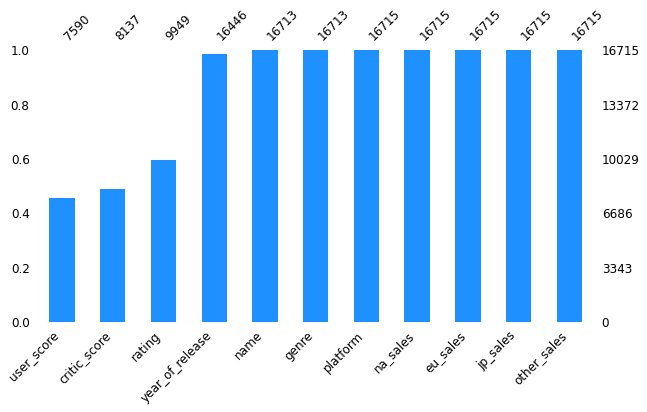

In [10]:
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Data gaps were found in 6 columns of the table.

#### Columns `user_score` and `critic_score`

Let's see how many rows have data gaps in the `user_score`, `critic_score` and `rating` columns at the same time.

In [11]:
len(df.loc[(df['user_score'].isna()) & (df['critic_score'].isna()) & (df['rating'].isna())])

6667

6667 rows are missing data in the `user_score`, `critic_score` and `rating` columns at the same time. Most likely, the data for these three columns was taken from the same source and either was not available in the source, or there was a technical problem with the data transfer, so they are simultaneously missing in a large amount of rows. Also, we remember that in 2424 lines the value of `tbd` in the column `user_score` we ourselves replaced with gaps. These reasons could result in missing data in the specified columns.

Missing user rating data and critic rating data cannot be filled in with zero, as this will skew the data. We investigate the relationship of these values with other parameters.

In [12]:
df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411,-0.267851
na_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200
eu_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337
jp_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598
other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


It can be seen from the correlation matrix that the closest linear relationship exists between the `critic_score` and `user_score` columns themselves. We construct histograms and scatterplots for these two quantities.

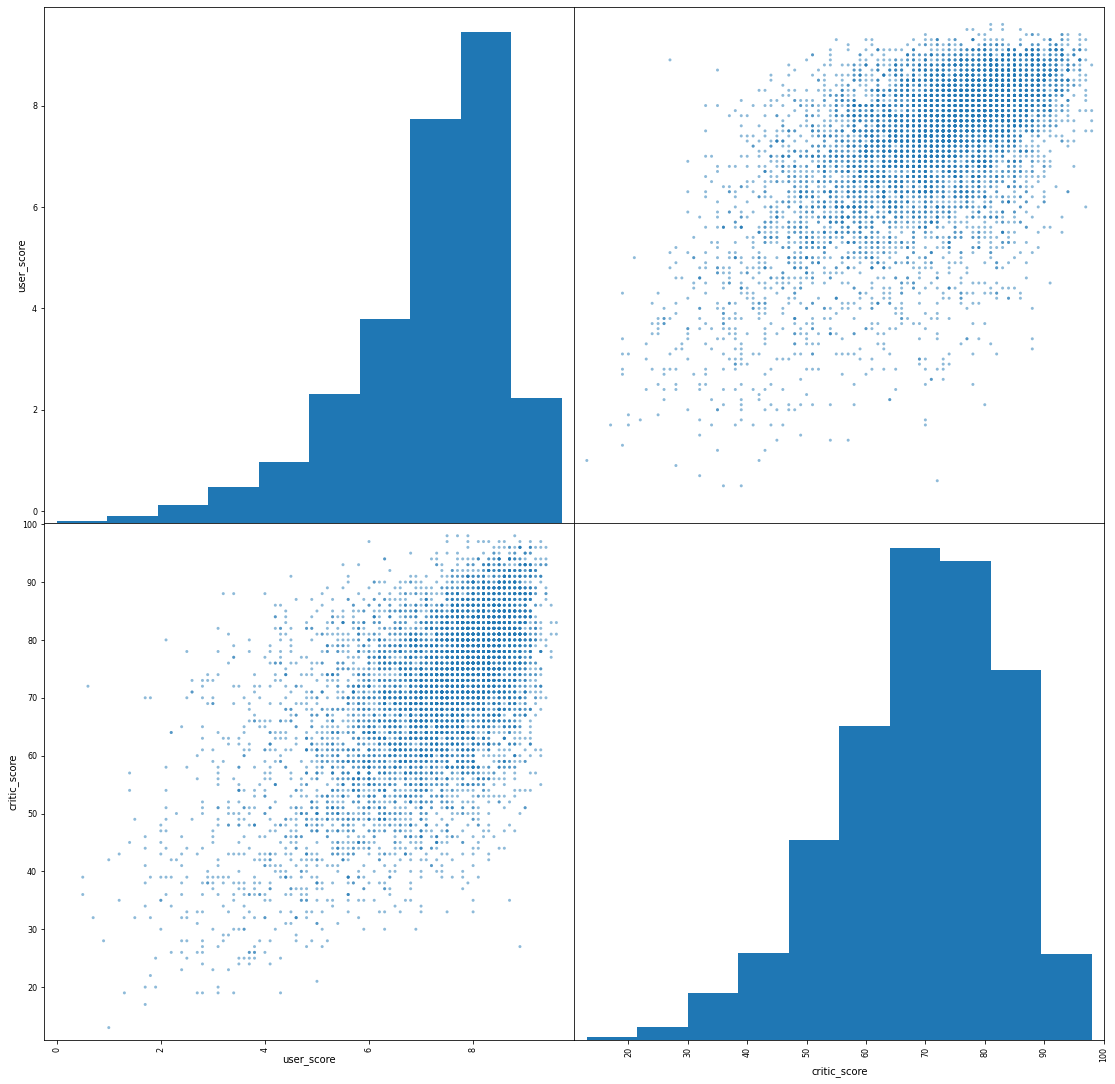

In [13]:
pd.plotting.scatter_matrix(df[['user_score', 'critic_score']], figsize=(19, 19));

There is a linear relationship: the higher the rating of critics, the higher the rating of users and vice versa, but it is not strong enough. Let us analyze the distribution of the values of the differences between the critics' score divided by 10 and the user's score.

In [14]:
# create a column with 'critic_score' values divided by 10
critic_score_div_10 = df['critic_score'] / 10
# create a column with values for the difference between the critics' score divided by 10 and the user's score
critic_and_user_score_diff = critic_score_div_10 - df['user_score']
# see a list of representative values for the difference between the critic score divided by 10 and the user score
critic_and_user_score_diff.describe().round(1)

count    7017.0
mean       -0.2
std         1.3
min        -6.2
25%        -0.9
50%        -0.2
75%         0.5
max         6.6
dtype: float64

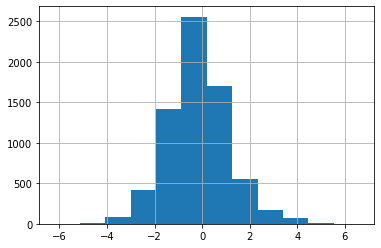

In [15]:
critic_and_user_score_diff.hist(bins=12);

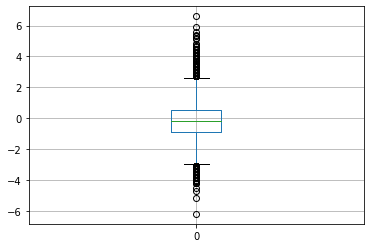

In [16]:
critic_and_user_score_diff.to_frame().boxplot();

We see that, on average, the critics' score is 0.2 points less than the user's score, but there is also a significant difference of up to 6 points, both up and down. The mean is slightly higher than the median, as there are more outliers in the positive direction and a maximum outlier of 6.6. The values have a normal distribution.

**Options for filling gaps in `user_score` and `critic_score` columns:**
*Option 1*
You can fill the gaps in the `critic_score` column if there is a value in the `user_score` column using the average difference, with the value (`user_score` - 0.2) * 10, and the gaps in the `user_score` column, if there is a value in the `critic_score` column, with the value (` critic_score` / 10) + 0.2.
*Option 2*
An alternative is to calculate the average `user_score` for a particular `critic_score` and vice versa, and fill in the gaps with the average.

**BUT:** estimates are an individual and subjective parameter, and filling them with calculated values, we will get a distortion of the result, so it is better to leave the gaps as they are here.

**Result:** The gaps in the `user_score` and `critic_score` columns will remain unchanged.

#### Column `rating`

In [17]:
df['rating'].isna().sum()

6766

As we noted earlier, 6667 rows are simultaneously missing data in the `user_score`, `critic_score` and `rating` columns. Most likely, the data for these three columns was taken from the same source and either was not available in the source, or there was a technical problem with data transfer. Let's leave the gaps as they are.

**Result:** leave the gaps in the `rating` column unchanged.

#### Column `year_of_release`

In [18]:
df['year_of_release'].isna().sum()

269

There are 269 gaps in the `year_of_release` column. The lack of data on the release year of the game may be due to an inadvertent omission by the operator when entering data or due to the lack of accurate information about the release year of the game. Let's fill in the gaps with the release year of the same game on other platforms. If release years differ on other platforms, take the median value and round up.

In [19]:
name_year = df.pivot_table(index=['name'], values='year_of_release', aggfunc='median')

def fill_year_of_release(row):
    global name_year
    if pd.isna(row['year_of_release']):
        if row['name'] in name_year.index:
            return int(name_year.loc[name_year.index==row['name'], 'year_of_release'])
    return row['year_of_release']

df['year_of_release'] = df.apply(fill_year_of_release, axis=1)
df['year_of_release'].isna().sum()

146

**Result:** we were able to fill in 123 gaps in the `year_of_release` column.

#### Columns `genre` and `name`

In [20]:
df[['genre', 'name']].isna().sum()

genre    2
name     2
dtype: int64

The `genre` and `name` columns have two spaces. Let's look at these lines.

In [21]:
df.loc[(df['genre'].isna()) | (df['name'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


These are just two games that lack title and genre data at the same time. Both games were released in 1993, a very long time ago. Perhaps this is due to the lack of data. Let's just remove these rows from the dataframe, since they are useless for analysis.

In [22]:
df = df.drop(df.loc[df['name'].isna()].index)
df.shape

(16713, 11)

**Result:** removed two rows from the dataframe with missing values in the `genre` and `name` columns.

#### Conclusions

1) As a result of gap processing, we were able to fill in 123 gaps in the `year_of_release` column;  

2) Two rows with missing values ​​in the `genre` and `name` columns have been removed from the dataframe.  

3) The simultaneous absence of data in the `user_score`, `critic_score` and `rating` columns may be due to the absence of this data in the source or to a technical problem in data transmission. Also, on 2424 lines, we replaced the `tbd` value in the `user_score` column with gaps ourselves. The lack of data in the `year_of_release` column about the year of release of the game can be caused by an accidental omission by the operator when entering data or due to the lack of accurate information about the year of release of the game. Game name and genre data was missing on two lines. Both games were released in 1993, a very long time ago. Perhaps this is due to the lack of data.

[Back to content](#contents)

### 3.4. Handling duplicates <a id='duplicates'> </a>

Check the dataframe for duplicate rows.

In [23]:
print(f'The table has {df.duplicated().sum()} duplicate rows.')

The table has 0 duplicate rows.


Let's check the `genre` column for implicit duplicates.

In [24]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

There are no implicit duplicates in the `genre` column.

Let's check the `platform` column for implicit duplicates.

In [25]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

There are no implicit duplicates in the `platform` column.

The `name` column needs to be checked for obvious duplicate game names, but with the understanding that a game can have the same name on different platforms. That is, you need to check for duplicates the names of games within the same platform. There is no point in checking for implicit duplicates, since a game can have the same or similar name for different release years and platforms. We will not be able to determine what is an implicit duplicate and what is a modification of the name.

Check the `name` column for obvious duplicate game names. To do this, we first create a `platform_name` dictionary, in which the keys will be the names of the platforms, and the values will be the lists of games. Then we find duplicate game titles within the same platform.

In [26]:
# create a platform_name dictionary with platform names as keys and game lists as values.
platform_name = {}
for platform in df['platform'].unique():
    if platform in platform_name.keys():
        platform_name[platform].append(df.loc[df['platform']==platform, 'name'].to_list())
    else:
        platform_name[platform] = df.loc[df['platform']==platform, 'name'].to_list()

# find duplicate game names within the same platform as follows: in the platform_name dictionary, compare the length of the list
# game names and the length of the list of unique values of the same list;
# if the length of the list of game names and the length of the list of unique values of the same list are not equal, we will write to the dictionary
# duplicated_games_dict platform name as key and game name having duplicate as dictionary value
duplicated_games_dict = {}
for platform in platform_name:
    games_by_platform_data = pd.DataFrame(platform_name[platform])
    count_names = len(platform_name[platform])
    unique_names = len(games_by_platform_data[0].unique())
    diff = count_names - unique_names
    if (diff != 0):
        dupl_games_lst = games_by_platform_data.loc[games_by_platform_data.duplicated(), 0].to_list()
        if platform in duplicated_games_dict:
            duplicated_games_dict[platform].append(dupl_games_lst)
        else:
            duplicated_games_dict[platform] = dupl_games_lst     
duplicated_games_dict

{'X360': ['Need for Speed: Most Wanted'],
 'PS3': ['Sonic the Hedgehog', 'Madden NFL 13'],
 'PC': ['Need for Speed: Most Wanted']}

Got a dictionary with duplicate game names by platform. Let's display the corresponding lines of the dataframe for analysis.

In [27]:
for platform, games in duplicated_games_dict.items():
    for name in games:
        display(df.loc[(df['name'] == name) & (df['platform'] == platform)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T


We see that two games `Need for Speed: Most Wanted` on the X360 platform came out with a difference of seven years. Perhaps it was a re-release of the game. We will consider them different games and leave a duplicate in the table. We will do the same with the game `Need for Speed: Most Wanted` for PC. The two games named `Sonic the Hedgehog` share the same year of publication and differ only in European sales. Let's see all the rows of the table with this game.

In [28]:
df.loc[df['name'] == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


The last line seems to contain incorrect data, so it should be removed.

Let's see all the rows of the table with the game `Madden NFL 13`.

In [29]:
df.loc[df['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


The last line also raises questions, so we will remove it too.

Let's delete two lines with duplicate names of games on the same platform and suspicious data.

In [30]:
df = df.drop([4127, 16230])
df.shape

(16711, 11)

**Result:** There are no duplicate rows in the original table, we managed to get rid of 2 obvious duplicates in the names of games on the same platform.

[Back to content](#contents)

### 3.5. Handling anomalies <a id='anomalies'> </a>

#### Quantitative parameters

Consider the characteristic values of numerical data sets in the columns of the dataset.

In [31]:
df.describe().round(2)

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16711.00,16711.00,16711.00,16711.00,8135.00,7588.00
mean,0.26,0.15,0.08,0.05,68.97,7.13
std,0.81,0.50,0.31,0.19,13.94,1.50
min,0.00,0.00,0.00,0.00,13.00,0.00
25%,0.00,0.00,0.00,0.00,60.00,6.40
50%,0.08,0.02,0.00,0.01,71.00,7.50
75%,0.24,0.11,0.04,0.03,79.00,8.20
max,41.36,28.96,10.22,10.57,98.00,9.70


For sales values, the median is less than the average, the datasets are skewed to the right. There are outliers in the maximum values that should be checked. The user and critic rating datasets are conversely skewed to the left, as the medians are larger than the mean, but not significantly. There are no anomalies in these columns. Let's construct histograms for quantitative parameters.

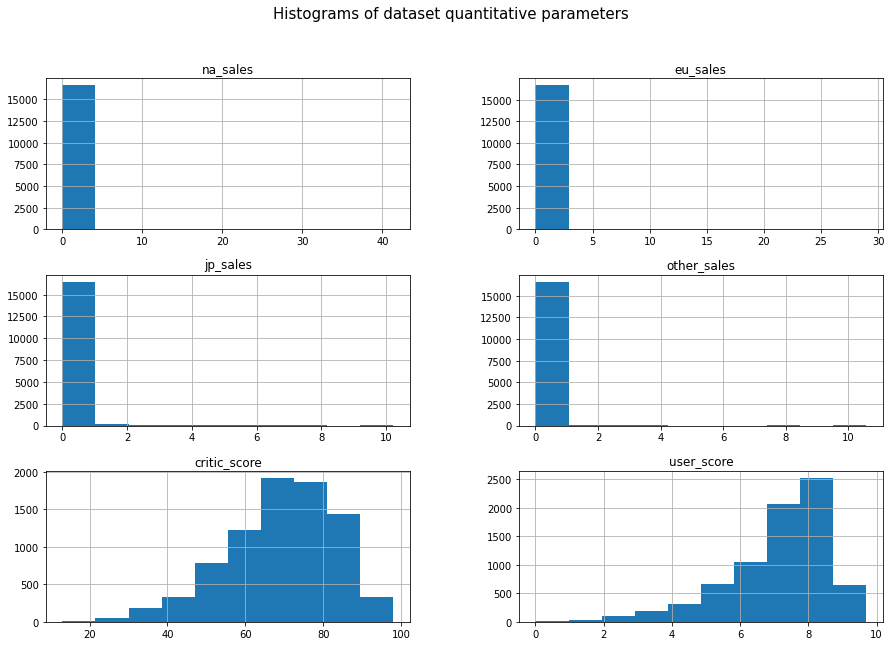

In [32]:
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].hist(figsize=(15, 10))
plt.suptitle("Histograms of dataset quantitative parameters", fontsize=15);

The histograms clearly show the skewness of the sales datasets to the right and the estimates to the left.

Let's check the rows with the highest sales values.

In [33]:
df.loc[(df['na_sales'] == df['na_sales'].max()) | (df['eu_sales'] == df['eu_sales'].max()) | 
       (df['jp_sales'] == df['jp_sales'].max()) | (df['other_sales'] == df['other_sales'].max())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M


The `Wii` game has sales peaks in North America and Europe, `Pokemon` in Japan, and `GTA` in the rest of the world. There is nothing anomalous in these data.

**Result:** There are no abnormal values in the data of the columns `na_sales`, `eu_sales`, `jp_sales`, `other_sales`, `critic_score`, `user_score`.

[Back to content](#contents)

#### Qualitative parameters

- **Columns `name`, `platform` and `genre`**

The `name`, `platform` and `genre` columns were covered in the duplicate handling step. They do not contain anomalous values.

- **Column `year_of_release`**

In [34]:
sorted(df['year_of_release'].dropna().unique())

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

There are no anomalous year values in the `year_of_release` column.

* **Column `rating`**

In [35]:
sorted(df['rating'].dropna().unique())

['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T']

There are no anomalous year values in the `rating` column.

**Result:** There are no outliers in the `name`, `platform`, `genre`, `year_of_release` and `rating` columns.

[Back to content](#contents)

### 3.6. Adding new columns <a id='add_new_columns'> </a>

Let's calculate the total sales in all regions and write them down in a new column `total_sales`.

In [36]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [37]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


[Back to content](#contents)

### 3.7. Conclusions <a id='data_preprocessing_conclusions'> </a>

As a result of data preprocessing, the following changes were made to the original dataset:  
1) the names of all columns are reduced to lower case;  
2) changed data type in columns:  
 * `year_of_release` from float *float64* to integer *int32*;  
 * `user_score` from string type to real *float64*;  
 
3) filled in the gaps in the columns:  
 * 123 gaps in the `year_of_release` column;  
 
4) 4 dataframe rows removed:  
 * two lines with missing values in the `genre` and `name` columns;  
 * two lines with obvious duplicates in the names of games on the same platform;  
 
5) added a new column `total_sales` with the values of total sales in all regions.  

It is necessary to pay attention to the simultaneous absence of data in the columns `user_score`, `critic_score` and `rating` in 6667 rows and identify the reasons.

[Back to content](#contents)

## 4. Exploratory data analysis <a id='research'> </a>

### 4.1. Game release dynamics by years <a id='games_release_by_years'> </a>

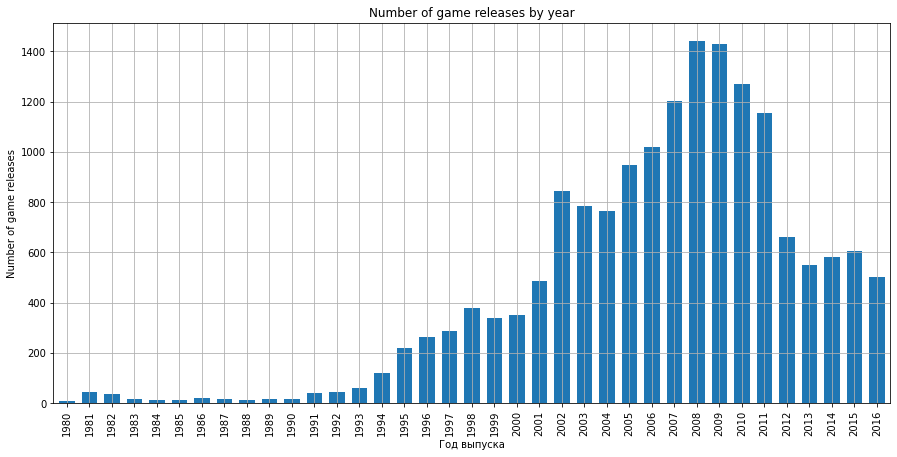

In [38]:
(
df.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', figsize=(15, 7), legend = False, xlabel='Год выпуска', ylabel='Number of game releases', grid=True, width=0.7)
    .set_title('Number of game releases by year', fontsize=12)
);

**Conclusion:**  
Between 1980 and 1994, there were less than 200 game releases per year, so data for this period is not important for analysis.
From 1995 to 2001 there was a gradual increase in the number of game releases from 200 to 500 games per year. In 2002, it jumps from 500 to 850 games per year and peaks at 1430-1440 games per year in 2008-2009. This is the golden age of game releases. since 2010, the decrease in the number of game releases per year begins in game releases comes in 1994 - and after it the boom begins - computer games take over the world. In 2012, there is a sharp drop from 1150 to 650 games per year and by 2016 it is in the range of 500-700 released games per year.

[Back to content](#contents)

### 4.2. Sales statistics by platform <a id='games_sales_by_platf'> </a>

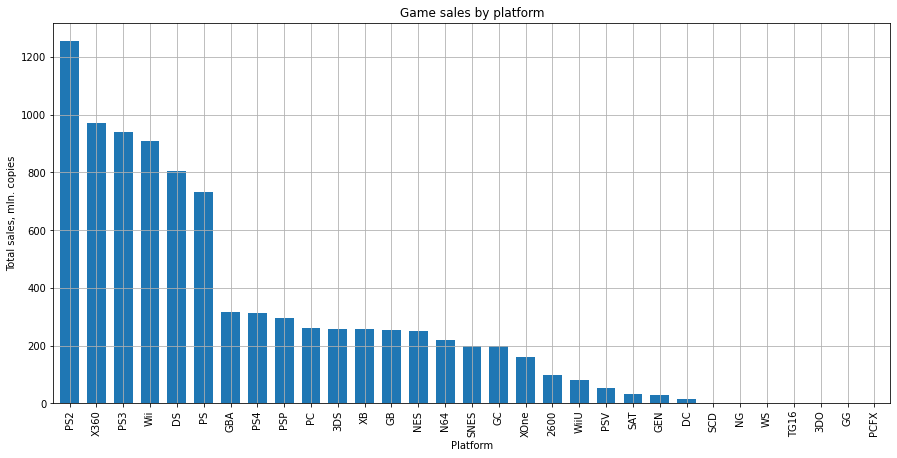

In [39]:
sales_by_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
(
    sales_by_platform
    .plot(kind='bar', figsize=(15, 7), legend = False, xlabel='Platform', ylabel='Total sales, mln. copies', grid=True, width=0.7)
    .set_title('Game sales by platform', fontsize=12)
);

Let's choose the first 6 platforms with the highest total sales and plot the distribution by years. Let's take data for the current period from 1995 to 2016.

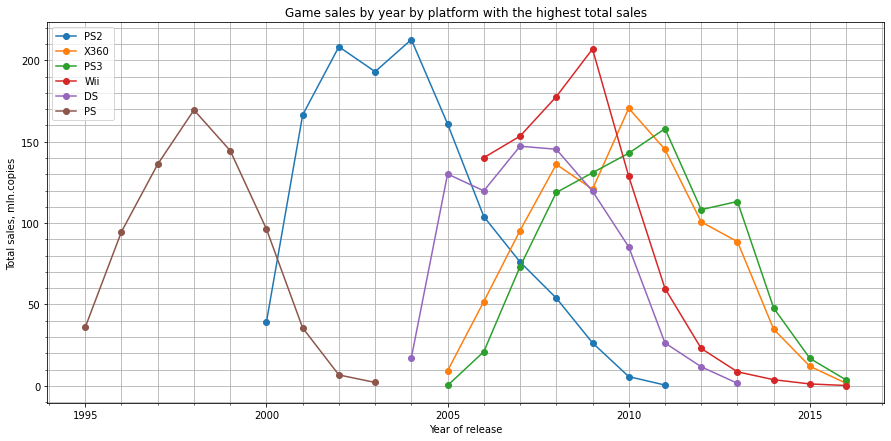

In [40]:
top_sales_platf = sales_by_platform.head(6).index.to_list()
top_platf_sales_by_year = df.pivot_table(index='year_of_release', 
                                         columns='platform', 
                                         values='total_sales', 
                                         aggfunc='sum')[top_sales_platf].loc[1995:]
(
    top_platf_sales_by_year
    .plot(figsize=(15, 7), xlabel='Year of release', ylabel='Total sales, mln.copies', style='-o')
    .set_title('Game sales by year by platform with the highest total sales', fontsize=12)
)
plt.legend(loc=2)
plt.minorticks_on()
plt.grid(visible=True, which='both')

Let's calculate the average platform life for 6 platforms with the highest total sales.

In [41]:
platf_life_time_list = []
for platform in top_sales_platf:
    platf_life_time_list.append(len(top_platf_sales_by_year[platform]) - top_platf_sales_by_year[platform].isna().sum())
print(f'Average life of the platform is {sum(platf_life_time_list)/len(platf_life_time_list)} years.')

Average life of the platform is 11.0 years.


**Conclusion:**  
PS2, X360, PS3, Wii, DS, PS platforms have the highest sales volume of PC games. The average platform life is 11 years. The graph shows that the platform has the highest sales from 3 to 7 years of existence.

[Back to content](#contents)

### 4.3. 2017 Potentially Profitable Platform Selection <a id='profitable_platf'> </a>

Let's find out which platforms are leading in sales and will be potentially profitable in 2017. The average life of the platform is 11 years, and the largest sales of the platform are from 3 to 7 years of existence. Let's take into account only the data for the current period - the last 3 years from 2014 to 2016, in order to build a forecast for 2017. Data for previous years will not be taken into account.
Let's build sales charts for each platform for the period from 2005 to 2016 so that we can estimate the life of the platforms.

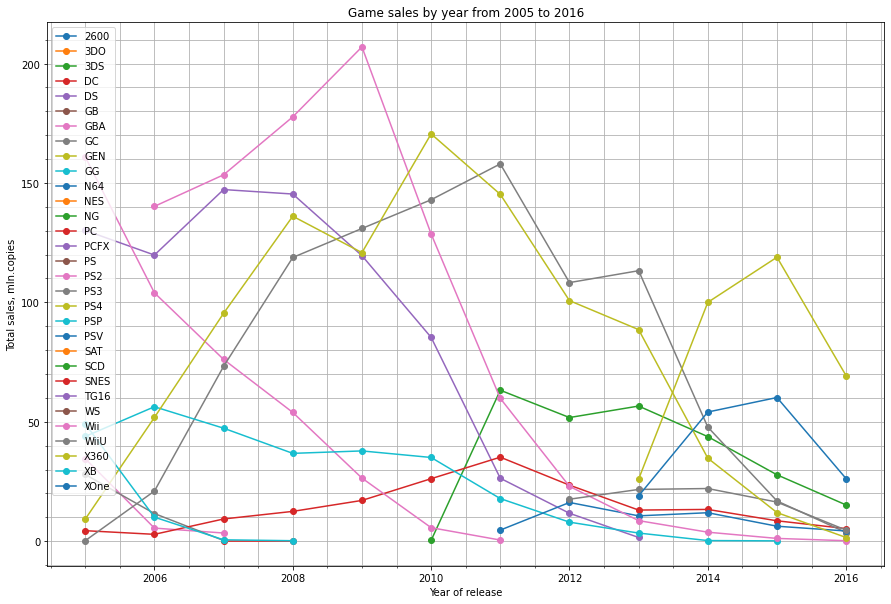

In [42]:
top_platf_sales_by_year = df.pivot_table(index='year_of_release', 
                                         columns='platform', 
                                         values='total_sales', 
                                         aggfunc='sum').loc[2005:]
(
    top_platf_sales_by_year
    .plot(figsize=(15, 10), xlabel='Year of release', ylabel='Total sales, mln.copies', style='-o')
    .set_title('Game sales by year from 2005 to 2016', fontsize=12)
)
plt.legend(loc=2)
plt.minorticks_on()
plt.grid(visible=True, which='both')

The graph shows that all platforms have a decline in sales in 2016 compared to 2015. In the description of the data, it was noted that the data for 2016 may not be complete. Therefore, in order to make a forecast for 2017, we will focus on the sales data of 2015, and we will not take into account the data for 2016. Let's display the data on sales for 2015 of "live" platforms and sort them by decreasing sales for 2015.

In [43]:
(
    df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
    .loc[:, [2015]]
    .dropna()
    .sort_values(by=2015, ascending=False)
)

year_of_release,2015
platform,
PS4,118.90
XOne,60.14
3DS,27.78
PS3,16.82
WiiU,16.35
X360,11.96
PC,8.52
PSV,6.25
Wii,1.14


The PS4 and XOne platforms have the greatest potential for sales and profit growth. They exist only 4 years and their life cycle has not yet reached the middle, so at the moment these are the most promising platforms. Only these two platforms showed sales growth in 2015. Platforms 3DS, PS3, X360, Wii, PSP are ending their life cycle and show a decline in sales in recent years, their best years are behind them. The WiiU platform has existed for 5 years, which means it has the potential for sales growth, although it showed a decrease in 2015 compared to 2014. The PC platform will always be in demand and will bring moderate profits, which demonstrates a stable sales trend for 10 years. The PSV platform has been in existence for 6 years and also demonstrates a stable moderate profit. Thus, the list of potentially profitable platforms is as follows:  
1) PS4  
2) XOne  
3) WiiU  
4) PC  
5) PSV

[Back to content](#contents)

### 4.4. Scope charts of global game sales by platform <a id='global_sales_by_platf'> </a>

Let's choose the most popular platforms for the current period from 2014 and build a range chart for the first five platforms.

In [44]:
top_5_platf_by_sales = df.loc[df['year_of_release'] > 2013].groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(5)
top_5_platf_by_sales

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22


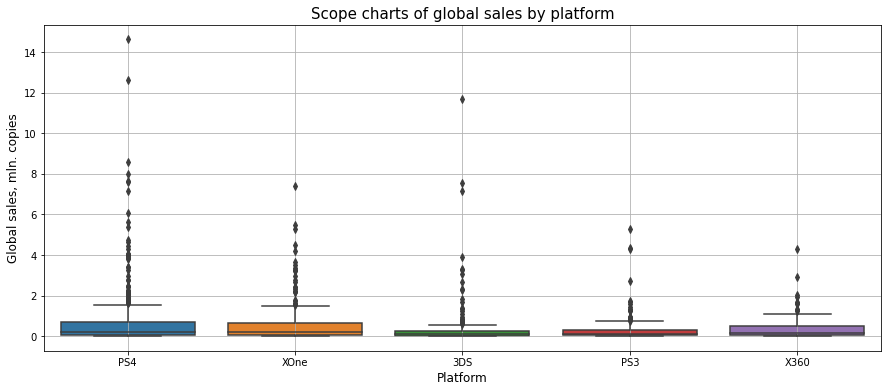

In [45]:
df_top_5_platf = df.loc[(df['platform'].isin(top_5_platf_by_sales['platform'].to_list())) & (df['year_of_release'] > 2013)]
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_top_5_platf, x='platform', y='total_sales', order=top_5_platf_by_sales['platform'].to_list());
plt.grid()
plt.title('Scope charts of global sales by platform', fontsize=15)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global sales, mln. copies', fontsize=12);

There are significant outliers in the sales values on the charts, which makes it impossible to see the median values. For example, for the PS4 platform, there are unique values greater than 12. Let's cut out the outliers by limiting the sales value to 2 million copies. After filtering, the sales values and the position of the platforms in the ranking will change. We will display the updated information on the screen.

In [46]:
df_top_5_platf = df_top_5_platf.loc[df_top_5_platf['total_sales'] <= 2]
top_5_platf_by_sales = df_top_5_platf.pivot_table(index='platform', 
                                                  values='total_sales', 
                                                  aggfunc=['sum', 'count']).sort_values(by=('sum', 'total_sales'), 
                                                                                        ascending=False)
top_5_platf_by_sales

,sum,count
,total_sales,total_sales
platform,,
PS4,111.94,337
XOne,71.10,208
PS3,51.57,215
3DS,39.46,202
X360,38.97,108


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,202.0,0.20,0.29,0.01,0.03,0.08,0.22,1.83
PS3,215.0,0.24,0.33,0.01,0.04,0.11,0.29,1.74
PS4,337.0,0.33,0.44,0.01,0.05,0.14,0.40,1.92
X360,108.0,0.36,0.43,0.01,0.07,0.18,0.45,1.92
XOne,208.0,0.34,0.42,0.01,0.04,0.15,0.48,1.80


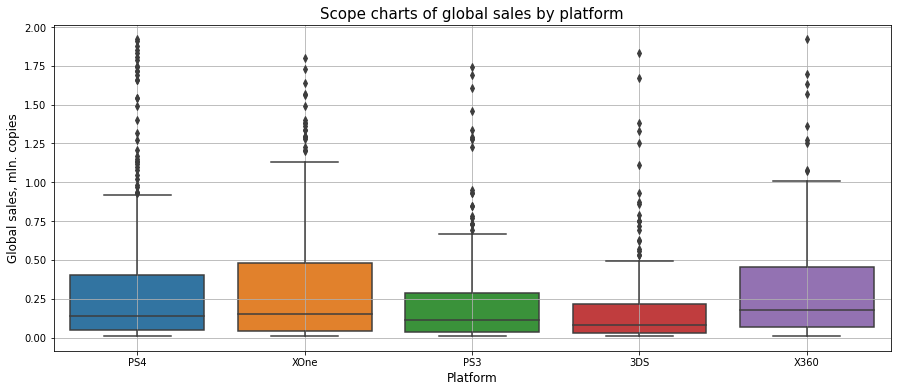

In [47]:
display(df_top_5_platf.groupby(by='platform')['total_sales'].describe().round(2))
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_top_5_platf, x='platform', y='total_sales', order=top_5_platf_by_sales.index.to_list());
plt.grid()
plt.title('Scope charts of global sales by platform', fontsize=15)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global sales, mln. copies', fontsize=12);

**Conclusion:**  
The first and second platforms in the PS4 and XOne rankings have very close medians of 0.14 and 0.15, respectively, but their mustache range is different: PS4 has normal values ​​less than 0.9, while XOne has less than 1.1. Median game sales for a successful platform: 0.1 to 0.2 million copies. The 3DS platform is in third place in sales, but has the smallest median (and mustache range) among the five platforms. This platform has the smallest spread in sales from game to game. That is, the platform brings a stable income from each game released. In this case, than The larger the “whiskers” of global sales by platform, the greater the scatter of sales values ​​for different games.

[Back to content](#contents)

### 4.5. Impact of user and critic scores on sales within the platform <a id='scores'> </a>

Let's take the most popular platform for the current period since 2014, PS4, and see how the reviews of users and critics affect game sales. Abnormal sales values will be cut off by the value of 2 million copies.

Pearson's correlation coefficient for critics scores and total sales: 0.3
Pearson's correlation coefficient for users scores and total sales: -0.022


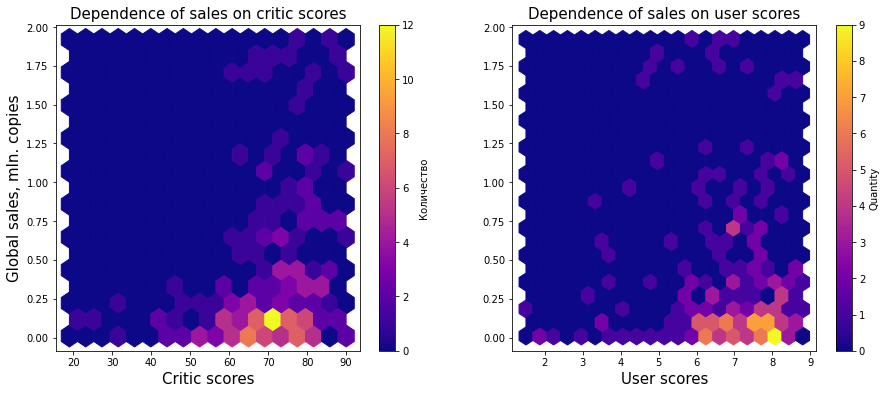

In [48]:
df_PS4 = df_top_5_platf.loc[(df['platform'] == 'PS4')].reset_index(drop=True)
print(f"Pearson's correlation coefficient for critics scores and total sales: {df_PS4['total_sales'].corr(df_PS4['critic_score']):.2}")
print(f"Pearson's correlation coefficient for users scores and total sales: {df_PS4['total_sales'].corr(df_PS4['user_score']):.2}")
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
hb1 = ax1.hexbin(x=df_PS4['critic_score'], y=df_PS4['total_sales'], gridsize=17, cmap='plasma')
cb1 = fig.colorbar(hb1, ax=ax1, label='Количество')
ax1.set_title('Dependence of sales on critic scores',  fontsize=15)
ax1.set_xlabel('Critic scores', fontsize=15)
ax1.set_ylabel('Global sales, mln. copies', fontsize=15)
hb2 = ax2.hexbin(x=df_PS4['user_score'], y=df_PS4['total_sales'], gridsize=20, cmap='plasma')
cb2 = fig.colorbar(hb2, ax=ax2, label='Quantity')
ax2.set_title('Dependence of sales on user scores',  fontsize=15)
ax2.set_xlabel('User scores', fontsize=15);

**Conclusion:**  
The Pearson correlation coefficient for critical reviews and sales is 0.3, which indicates a moderate linear relationship between the two values - the higher the critics' score, the higher the sales. It can be seen from the chart that games with a score of up to 60 have sales of up to 0.125. To have median sales for a successful platform, the critics' score must be at least 60 points. From 70 to 80 sales points can go up to a million or more. There is no relationship between user reviews and sales. Pearson's correlation coefficient -0.022. The relationship between critic ratings and sales is closer than that of user ratings.

Let's correlate the findings with sales of games on other platforms. Let's create a table with two columns for Pearson's coefficients (sales - critic ratings, sales - user ratings) and populate them with values for each platform.

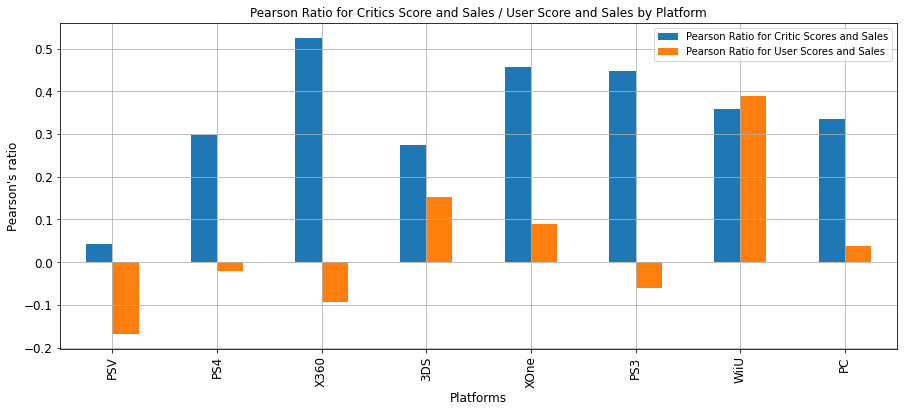

In [49]:
# filter the date frame to use the current period and remove sales outliers
df_since_2014_cut_sales = df.loc[(df['year_of_release'] > 2013) & (df['total_sales'] <= 2)]
platforms = df_since_2014_cut_sales['platform'].unique()
# create a table for Pearson's correlation coefficients and fill it in a loop, going through the platforms
df_pirson_by_platform = pd.DataFrame(index=platforms, columns=[['pirson_critic_sales', 'pirson_user_sales']])
for platform in platforms:
    df_one_platf = df_since_2014_cut_sales.loc[df_since_2014_cut_sales['platform'] == platform]
    df_pirson_by_platform.loc[platform, 'pirson_critic_sales'] = df_one_platf['critic_score'].corr(df_one_platf['total_sales'])
    df_pirson_by_platform.loc[platform, 'pirson_user_sales'] = df_one_platf['user_score'].corr(df_one_platf['total_sales'])
# build a bar chart for visualization
df_pirson_by_platform.dropna().plot(figsize=(15, 6), 
                                    kind='bar', grid=True, fontsize=12)
plt.xlabel('Platforms', fontsize=12);
plt.ylabel("Pearson's ratio", fontsize=12)
plt.title('Pearson Ratio for Critics Score and Sales / User Score and Sales by Platform', fontsize=12)
plt.legend(['Pearson Ratio for Critic Scores and Sales', "Pearson Ratio for User Scores and Sales"]);

**Conclusion:**  
Our findings hold true for most platforms: critic scores are more closely related to sales than user reviews. Only for the WiiU platform, the correlation coefficient of user rating - sales is greater than the ratio of critics rating - sales. For all platforms, the correlation coefficient critics' score - sales is positive, but does not exceed 0.6. It is noteworthy that for the three platforms PSV, X360, PS3, the Pearson correlation coefficient user assessment - sales is negative, that is, there is an inverse relationship between them. Overall, this suggests a very weak relationship between user ratings and sales.

[Back to content](#contents)

### 4.6. General distribution of games by genre <a id='genres'> </a>

Let's look at the overall distribution of games by genre for the current period since 2014. Let's find out if genres with high and low sales stand out and what can be said about the most profitable genres.

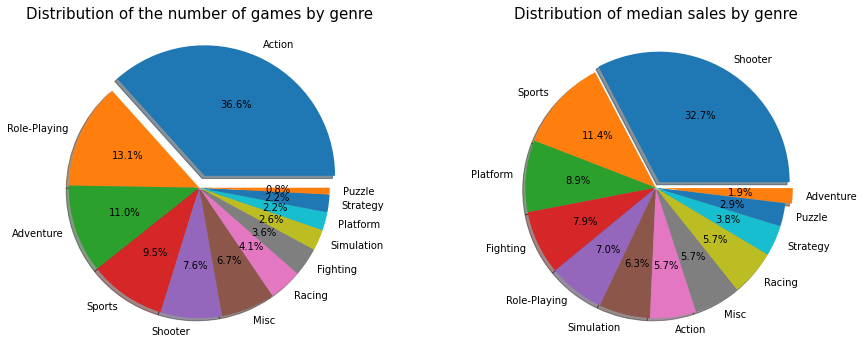

In [50]:
df_pivot_by_genre = df.loc[(df['year_of_release'] > 2013)].pivot_table(index='genre', values=['total_sales'], aggfunc=['count', 'median'])
df_pivot_by_genre.columns = ['count', 'median']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
pie1 = ax1.pie(df_pivot_by_genre['count'].sort_values(ascending=False), 
               labels=df_pivot_by_genre['count'].sort_values(ascending=False).index, 
               autopct='%1.1f%%', explode=(0.1,0,0,0,0,0,0,0,0,0,0,0), shadow=True)
ax1.set_title('Distribution of the number of games by genre',  fontsize=15)
pie2 = ax2.pie(x=df_pivot_by_genre['median'].sort_values(ascending=False), 
               labels=df_pivot_by_genre['median'].sort_values(ascending=False).index, 
               autopct='%1.1f%%', explode=(0.05,0,0,0,0,0,0,0,0,0,0,0.05), shadow=True)
ax2.set_title('Distribution of median sales by genre',  fontsize=15);

**Conclusion:**  
Most games are released in the Action genre (23%). The most popular and profitable genre is Shooter, sales account for 33% of the sales of all games. The top three in terms of sales also include the Sports (11.4%) and Platform (9%) genres. The lowest selling genres are Strategy (3.8%), Puzzle (3%) and Adventure (2%).

[Back to content](#contents)

## 5. User portrait of each region <a id='portrait_of_user'> </a>

Define for the user of each region (NA, EU, JP):  
- Most popular platforms (top 5). Let's look at the differences in sales shares.  
- The most popular genres (top 5). Let's see the difference.  
- Find out if the ESRB rating affects sales in a particular region.

### 5.1. Top 5 popular platforms in regions <a id='top_5_by_platf'> </a>

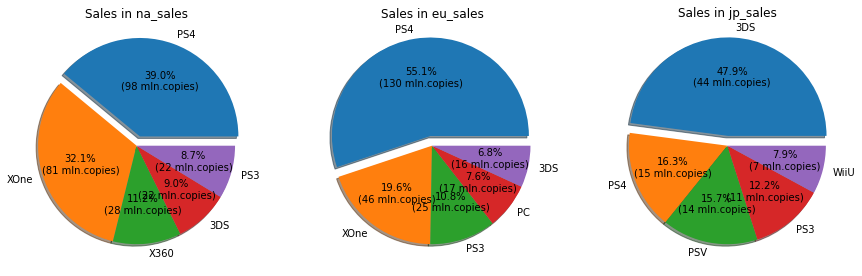

In [51]:
# we will use data for the current period from 2014
df_since_2014 = df.loc[(df['year_of_release'] > 2013)]
region = ['na_sales', 'eu_sales', 'jp_sales']

# write a function that will build sales charts by region
# the function takes parameters: dataframe, parameter for which sales are needed and what top is needed
def draw_top5_pies_by_regions(df, group, top):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
    explode = [0] * top
    explode[0] = 0.1
    for i in range(3):
        df_grouped = df.groupby(group)[region[i]].sum().sort_values(ascending=False).head(top)
        axes[i].pie(df_grouped, labels=df_grouped.index, autopct=lambda pct: func(pct, df_grouped), explode=explode, shadow=True)
        axes[i].set_title(f'Sales in {region[i]}')

# func returns sales as a percentage and absolute sales as a string to display on the pie
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} mln.copies)".format(pct, absolute)

draw_top5_pies_by_regions(df_since_2014, 'platform', 5)

**Conclusion:**  
In North America and Europe, the most popular platform is PS4, while in Japan it is 3DS. It can be noted that in Japan, the XOne platform is not in the top 5 most popular, but WiiU and PSV are popular there, which are not in the top 5 in other regions. The situation is similar with X360 in North America and PC in Europe.

[Back to content](#contents)

### 5.2. Top 5 popular genres in regions <a id='top_5_by_genres'> </a>

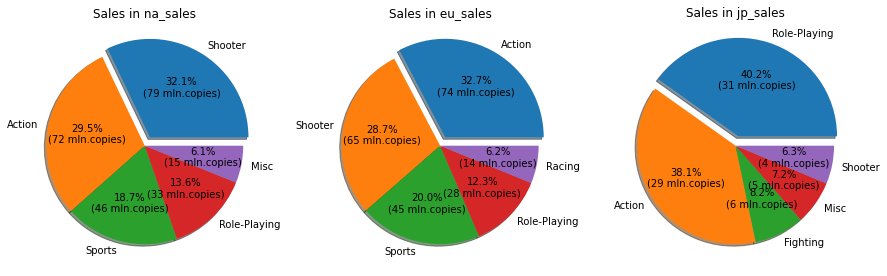

In [52]:
draw_top5_pies_by_regions(df_since_2014, 'genre', 5)

**Conclusion:**  
In North America and Europe, the most popular genres are Shooter, Action, Sports. The cultures of North America and Europe are close, so genre preferences are the same. In Japan, the most popular role-playing genre is the Japanese role-playing game. Most of these games were developed in Japan and primarily for the domestic Japanese market. This genre has not gained such popularity in North America or Europe. Still, the cultures of Western countries and the land of the rising sun are very different. Following in popularity in Japan are Action, Fighting, Misc and Shooter genres.

[Back to content](#contents)

### 5.3. Impact of ESRB rating on sales in certain regions <a id='rating_influence'> </a>

In [53]:
display(df.groupby('rating')[region].sum().sort_values(by='na_sales', ascending=False))

,na_sales,eu_sales,jp_sales
rating,,,
E,1292.99,710.24,198.11
T,759.75,427.03,151.40
M,748.48,483.97,64.24
E10+,353.32,188.04,40.20
K-A,2.56,0.27,1.46
EC,1.53,0.11,0.00
AO,1.26,0.61,0.00
RP,0.00,0.08,0.00


The table shows that the games use 4 main ratings: "E", "T", "M" and "E10+". The rest of the ratings are practically not used, so it makes no sense to take them into account on the diagrams.

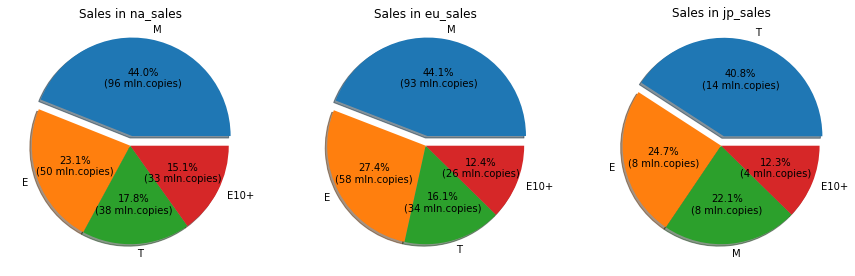

In [54]:
draw_top5_pies_by_regions(df_since_2014, 'rating', 4)

Rating help:  
- "E" ("K-A" until 1998) ("Everyone") - "For everyone"  
- "T" ("Teen") - "Teens"  
- "M" ("Mature") - "For adults"  
- "E10+" ("Everyone 10 and older")  
- "EC" ("Early childhood") - "For young children"  
- "AO" ("Adults Only 18+") - "Only for adults"  
- "RP" ("Rating Pending") - "Rating is pending"

Source: https://www.esrb.org/

**Conclusion:**  
All regions have a similar picture of the impact of ratings on sales. Games rated "M" are the most popular in North America and Europe. Games rated "T" are the most popular in Japan. In the Japanese market, teen-oriented games are more popular than adult-oriented ones.

[Back to content](#contents)

### 5.4. Conclusions <a id='portrait_conclusion'> </a>

The user profile for each region looks like this:

|User                    | Favorite platform | Favorite genre | Game Rating
|:----:                  | :----:            | :----:         | :----:
|User from North America | PS4               | Shooter        | M, E
|User from Europe        | PS4               | Action         | M, E
|User from Japan         | 3DS               | Role playing   | T, E

[Back to content](#contents)

## 6. Hypothesis checking <a id='hypothesis_checking'> </a>

### 6.1. The average user ratings of the Xbox One and PC platforms are the same <a id='user_scores_avg'> </a>

Let's test the hypothesis that the average user ratings of the Xbox One and PC platforms are equal in the taken samples of user ratings for these two platforms for the current period since 2014. Let us formulate the null (H₀) and alternative hypotheses (H₁):  
- H₀: The average user ratings of the Xbox One and PC platforms are equal;  
- H₁: The average user ratings of the Xbox One and PC platforms are not equal.

To test the hypothesis about the equality of the mean of two general populations for the samples taken from them, we use a statistical test using the t-distribution (method `scipy.stats.ttest_ind()`)

Let's get a selection of user ratings for the Xbox One and PC consoles.

In [55]:
x_box_one = df_since_2014[df_since_2014['platform'] == 'XOne']['user_score'].dropna()
pc = df_since_2014[df_since_2014['platform'] == 'PC']['user_score'].dropna()

We have no reason to believe that the sample variances are equal. Let's check.

In [56]:
if (np.var(x_box_one) == np.var(pc)):
    print('The samples variances are equal.')
else:
    print('The samples variances are not equal.')

The samples variances are not equal.


Thus the `equal_var` parameter should be set to `False`.
Set the `alpha` significance level to 0.05.

In [57]:
alpha = .05
result = st.ttest_ind(x_box_one, pc, equal_var=False)
print('p-value:', result.pvalue)
if result.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-value: 0.11601398086668835
Failed to reject the null hypothesis


**Conclusion:**  
The probability that the average user ratings of the Xbox One and PC platforms are the same, provided that the null hypothesis is true, is higher than the significance level. We cannot conclude that there is a significant difference between the means of the two populations, so we cannot reject the null hypothesis. We accept the null hypothesis that the average user ratings of the Xbox One and PC platforms are equal.

[Back to content](#contents)

### 6.2. Average user ratings for Action and Sports are different <a id='user_scores_avg_2'> </a>

Let's test the hypothesis that the average user ratings of the Action and Sports genres are different across samples for the current period since 2014. Let us formulate the null (H₀) and alternative hypotheses (H₁):  
- H₀: Average user ratings for Action and Sports are equal;  
- H₁: The average user ratings of the Action and Sports genres are not equal.  

To test the hypothesis about the equality of the mean of two general populations for the samples taken from them, we use a statistical test using the t-distribution (method `scipy.stats.ttest_ind()`)

Let's get a selection of user ratings for Action and Sports genres.

In [58]:
action = df_since_2014[df_since_2014['genre'] == 'Action']['user_score'].dropna()
sports = df_since_2014[df_since_2014['genre'] == 'Sports']['user_score'].dropna()

We have no reason to believe that the sample variances are equal. Let's check.

In [59]:
if (np.var(action) == np.var(sports)):
    print('The samples variances are equal.')
else:
    print('The samples variances are not equal.')

The samples variances are not equal.


Thus the `equal_var` parameter should be set to `False`.
Set the `alpha` significance level to 0.05.

In [60]:
alpha = .05
result = st.ttest_ind(action, sports, equal_var=False)
print('p-values:', result.pvalue)
if result.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-values: 1.1825550382644557e-14
Rejecting the null hypothesis


**Conclusion:**  
The probability that the average user ratings of the Action and Sports genres are equal, provided that the null hypothesis is true, is less than the level of significance. We conclude that there is a significant difference between the means of the two populations, reject the null hypothesis and accept the alternative hypothesis that the average user ratings of the Action and Sports genres are not equal.

[Back to content](#contents)

## 7. Research results <a id='research_results'> </a>

In this paper, historical data on sales of computer games, user and expert ratings, genres and platforms were examined.
Data pre-processing was performed - gaps and outliers were processed, data types were changed in some columns, and a new column with global sales was added for data analysis. A large number of rows were found (40% of the total) with no data at all in the `user_score`, `critic_score` and `rating` columns. It is necessary to carry out work to identify and eliminate the causes of gaps. Also, about 15% of the total rows have gaps in the `user_score` column, since we replaced the `tbd` value in them with gaps.
Further, the data was studied and interesting patterns were identified that determine the success of the game:  
1) potentially profitable platforms that are leading in sales and growing:  
 1. PS4    
 2. XOne   
 3. WiiU  
 4. PC  
 5. PSV  

2) Median game sales for a successful platform: 0.1 to 0.2 million copies.  
3) Critics' reviews are more closely related to sales than user reviews, there is a moderate linear relationship - the higher the critics' score, the higher the sales.  
4) In order to have median sales of a successful platform, the critics' score must be at least 60 points;  
5) The most profitable game genre is Shooter (33% of all game sales), followed by Sports (11.4%) and Platform (9%);  
6) The user portrait of each region looks like this:  

|User                    | Favorite platform | Favorite genre | Game Rating
|:----:                  | :----:            | :----:         | :----:
|User from North America | PS4               | Shooter        | M, E
|User from Europe        | PS4               | Action         | M, E
|User from Japan         | 3DS               | Role playing   | T, E

7) The average user ratings of the Xbox One and PC platforms are the same.  
8) The average user ratings of the Action and Sports genres are different.  

**Recommendations:**  
Potentially popular product to be bid on and plan advertising campaigns must be on PS4 platform of M-rated shooter genre with a critical score of at least 60 points. For Japan market, 3DS platform, Role-Playing product genre and T rating will be preferable.

[Back to content](#contents)